In [1]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\palay\\OneDrive\\Desktop\\ai_police\\health\\ml\\anemia\\anemia.csv')

In [3]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [5]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [6]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [8]:
import seaborn as sns

<Axes: ylabel='Hemoglobin'>

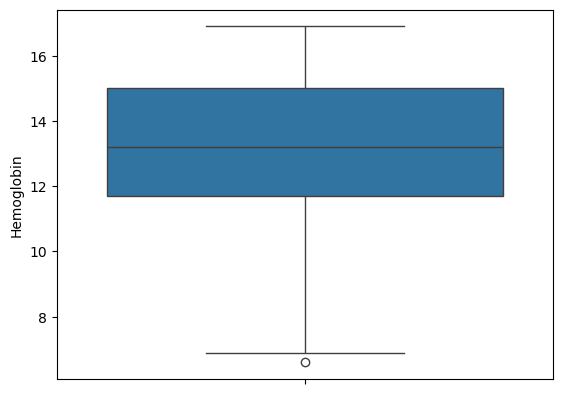

In [9]:
sns.boxplot(df['Hemoglobin'])

<Axes: ylabel='MCH'>

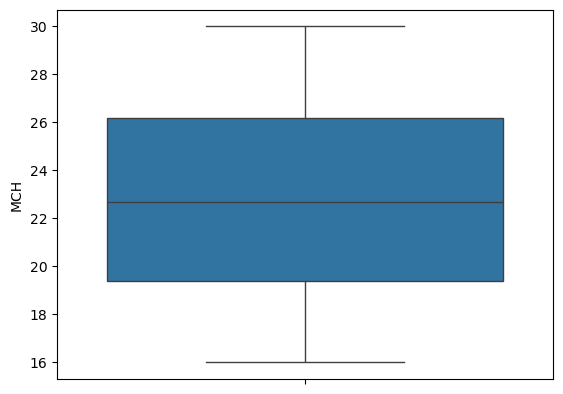

In [10]:
sns.boxplot(df['MCH'])

<Axes: ylabel='MCHC'>

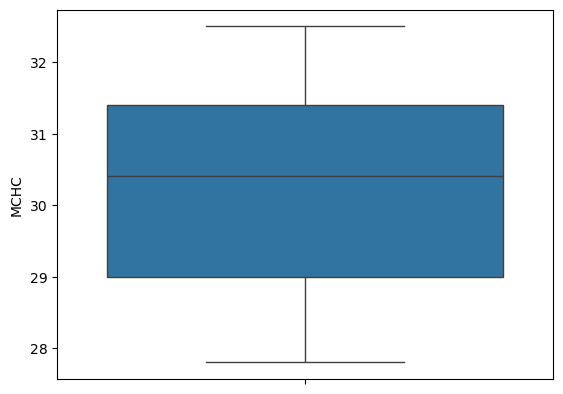

In [11]:
sns.boxplot(df['MCHC'])

<Axes: ylabel='MCV'>

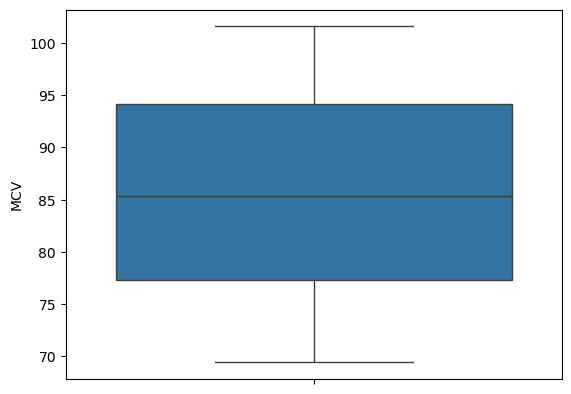

In [12]:
sns.boxplot(df['MCV'])

In [13]:
from sklearn.compose import ColumnTransformer

In [14]:
count_0,count_1=df.Result.value_counts()

In [15]:
d_count_0=df[df['Result']==0]
d_count_1=df[df['Result']==1]

In [16]:
d_count_0.shape

(801, 6)

In [17]:
d_count_1.shape

(620, 6)

In [18]:
d_class0_under=d_count_0.sample(count_1)

In [19]:
d_test_under=pd.concat([d_class0_under,d_count_1],axis=0)

In [20]:
print(d_test_under.Result.value_counts())

Result
0    620
1    620
Name: count, dtype: int64


In [22]:
d_test_under.shape

(1240, 6)

In [49]:
num_cols=['MCV','MCHC','MCH']

In [50]:
d_test_under

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
746,1,14.9,22.4,29.9,80.6,0
551,1,13.7,18.7,30.3,69.4,0
1038,0,12.4,25.6,29.6,89.9,0
234,0,15.6,28.8,30.8,86.4,0
145,1,15.3,18.1,31.4,83.5,0
...,...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2,1
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1


In [52]:
num_cols

['MCV', 'MCHC', 'MCH']

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:

preprocessor = ColumnTransformer(
    transformers=[
       
        ('scaler',StandardScaler(),num_cols)
    ]
)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Classifier',DecisionTreeClassifier()
)

    
])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x=d_test_under[['MCV','MCH','MCHC']]


In [59]:
y=d_test_under[['Result']]


In [60]:
x.shape

(1240, 3)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
x_train.columns
 

Index(['MCV', 'MCH', 'MCHC'], dtype='object')

In [63]:
y_train.columns

Index(['Result'], dtype='object')

In [65]:
print(d_test_under.columns)


Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')


In [66]:
x_train.columns

Index(['MCV', 'MCH', 'MCHC'], dtype='object')

In [67]:
y_train.columns

Index(['Result'], dtype='object')

In [68]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['MCV', 'MCHC', 'MCH'])])),
                ('Classifier', DecisionTreeClassifier())])

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
ypred=pipeline.predict(x_test)

In [74]:
print(accuracy_score(y_test,ypred))

0.9637096774193549


In [79]:
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred))

0.963855421686747


In [80]:
from sklearn.metrics import recall_score
print(recall_score(y_test,ypred))

0.967741935483871


In [82]:
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred))

0.96


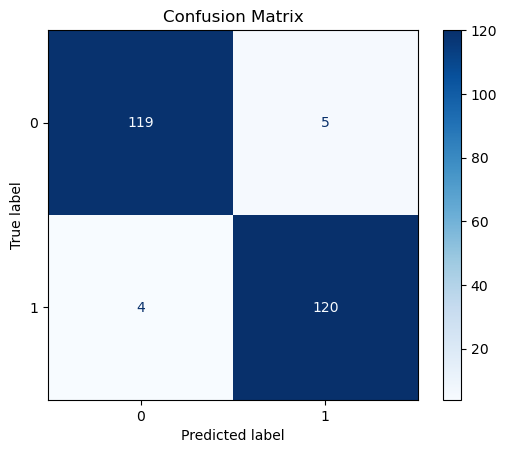

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(y_test, ypred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()
